In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [98]:
# https://jfly.uni-koeln.de/color/
# https://nanx.me/oneclust/reference/cud.html
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())
sns.set_theme(style="whitegrid")

def cud(n: int = len(cud_palette), start: int = 0) -> list[str]:
    remainder = cud_palette[:start]
    palette = cud_palette[start:] + remainder
    return palette[:n]

In [40]:
palette = {"TP": named_colors["blue"], "FP": named_colors["orange"], "FN": named_colors["vermilion"]}

In [135]:
df = pd.read_csv("../results/assess/mutref/annotations.csv", low_memory=False)

In [139]:
frames = []
for p in Path("../results/assess/mutref").rglob("*.precision-recall.tsv"):
    _df = pd.read_csv(p, sep="\t")
    _df["sample"] = p.parent.name
    mask = "without" in p.name
    
    if "illumina" in str(p):
        caller = "illumina"
    else:
        caller = p.parts[-7]
        if caller != "clair3":
            continue
        dp = int(p.parts[-6][:-1])
        if dp < 100:
            continue
        mode = p.parts[-5]
        if mode == "duplex":
            continue
        model = p.parts[-3].split("_")[-1].split("@")[0]
        if model != "sup":
            continue
    _df["mask_repeats"] = mask
    _df["caller"] = caller
    frames.append(_df)

mask_df = pd.concat(frames)
mask_df.reset_index(inplace=True)

In [140]:
mask_df

,index,VAR_TYPE,MIN_QUAL,PREC,RECALL,F1_SCORE,F1_QSCORE,TRUTH_TOTAL,TRUTH_TP,TRUTH_FN,QUERY_TOTAL,QUERY_TP,QUERY_FP,sample,mask_repeats,caller
0,0,SNP,0,1.0,1.000000,1.000000,100.00000,2102,2102,0,2102,2102,0,AMtb_1__202402,False,clair3
1,1,SNP,1,1.0,1.000000,1.000000,100.00000,2102,2102,0,2102,2102,0,AMtb_1__202402,False,clair3
2,2,SNP,2,1.0,1.000000,1.000000,100.00000,2102,2102,0,2102,2102,0,AMtb_1__202402,False,clair3
3,3,SNP,3,1.0,1.000000,1.000000,100.00000,2102,2102,0,2102,2102,0,AMtb_1__202402,False,clair3
4,4,SNP,4,1.0,1.000000,1.000000,100.00000,2102,2102,0,2102,2102,0,AMtb_1__202402,False,clair3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389523,82083,ALL,20517,1.0,0.000017,0.000034,0.00015,58100,1,58099,1,1,0,ATCC_17802__202309,True,illumina
1389524,82084,ALL,20518,1.0,0.000017,0.000034,0.00015,58100,1,58099,1,1,0,ATCC_17802__202309,True,illumina
1389525,82085,ALL,20519,1.0,0.000017,0.000034,0.00015,58100,1,58099,1,1,0,ATCC_17802__202309,True,illumina
1389526,82086,ALL,20520,1.0,0.000017,0.000034,0.00015,58100,1,58099,1,1,0,ATCC_17802__202309,True,illumina


In [141]:
dataix = (
    mask_df.query("VAR_TYPE == 'ALL'")
    .groupby(["sample", "caller", "mask_repeats"])["F1_SCORE"]
    .idxmax()
)
best_mask = mask_df.iloc[dataix]

In [142]:
best_mask

,index,VAR_TYPE,MIN_QUAL,PREC,RECALL,F1_SCORE,F1_QSCORE,TRUTH_TOTAL,TRUTH_TP,TRUTH_FN,QUERY_TOTAL,QUERY_TP,QUERY_FP,sample,mask_repeats,caller
10989,333,ALL,0,1.000000,0.999957,0.999978,46.636185,23043,23042,1,23042,23042,0,AJ292__202310,False,clair3
11433,333,ALL,0,1.000000,0.999956,0.999978,46.553459,22605,22604,1,22604,22604,0,AJ292__202310,True,clair3
1187409,22817,ALL,32,0.999126,0.991972,0.995536,23.502613,23043,22858,185,22878,22858,20,AJ292__202310,False,illumina
1217856,22884,ALL,99,0.999646,0.999248,0.999447,32.571720,22605,22588,17,22596,22588,8,AJ292__202310,True,illumina
333,333,ALL,0,1.000000,0.999562,0.999781,36.591084,2281,2280,1,2280,2280,0,AMtb_1__202402,False,clair3
777,333,ALL,0,1.000000,1.000000,1.000000,100.000000,2027,2027,0,2027,2027,0,AMtb_1__202402,True,clair3
35917,23485,ALL,46,0.995960,0.972819,0.984254,18.028215,2281,2219,62,2228,2219,9,AMtb_1__202402,False,illumina
67135,23451,ALL,12,0.995520,0.986680,0.991080,20.496490,2027,2000,27,2009,2000,9,AMtb_1__202402,True,illumina
4329,333,ALL,0,0.999948,0.999739,0.999844,38.057560,19183,19178,5,19172,19171,1,ATCC_10708__202309,False,clair3
3885,333,ALL,0,0.999946,0.999729,0.999837,37.887165,18439,18434,5,18428,18427,1,ATCC_10708__202309,True,clair3


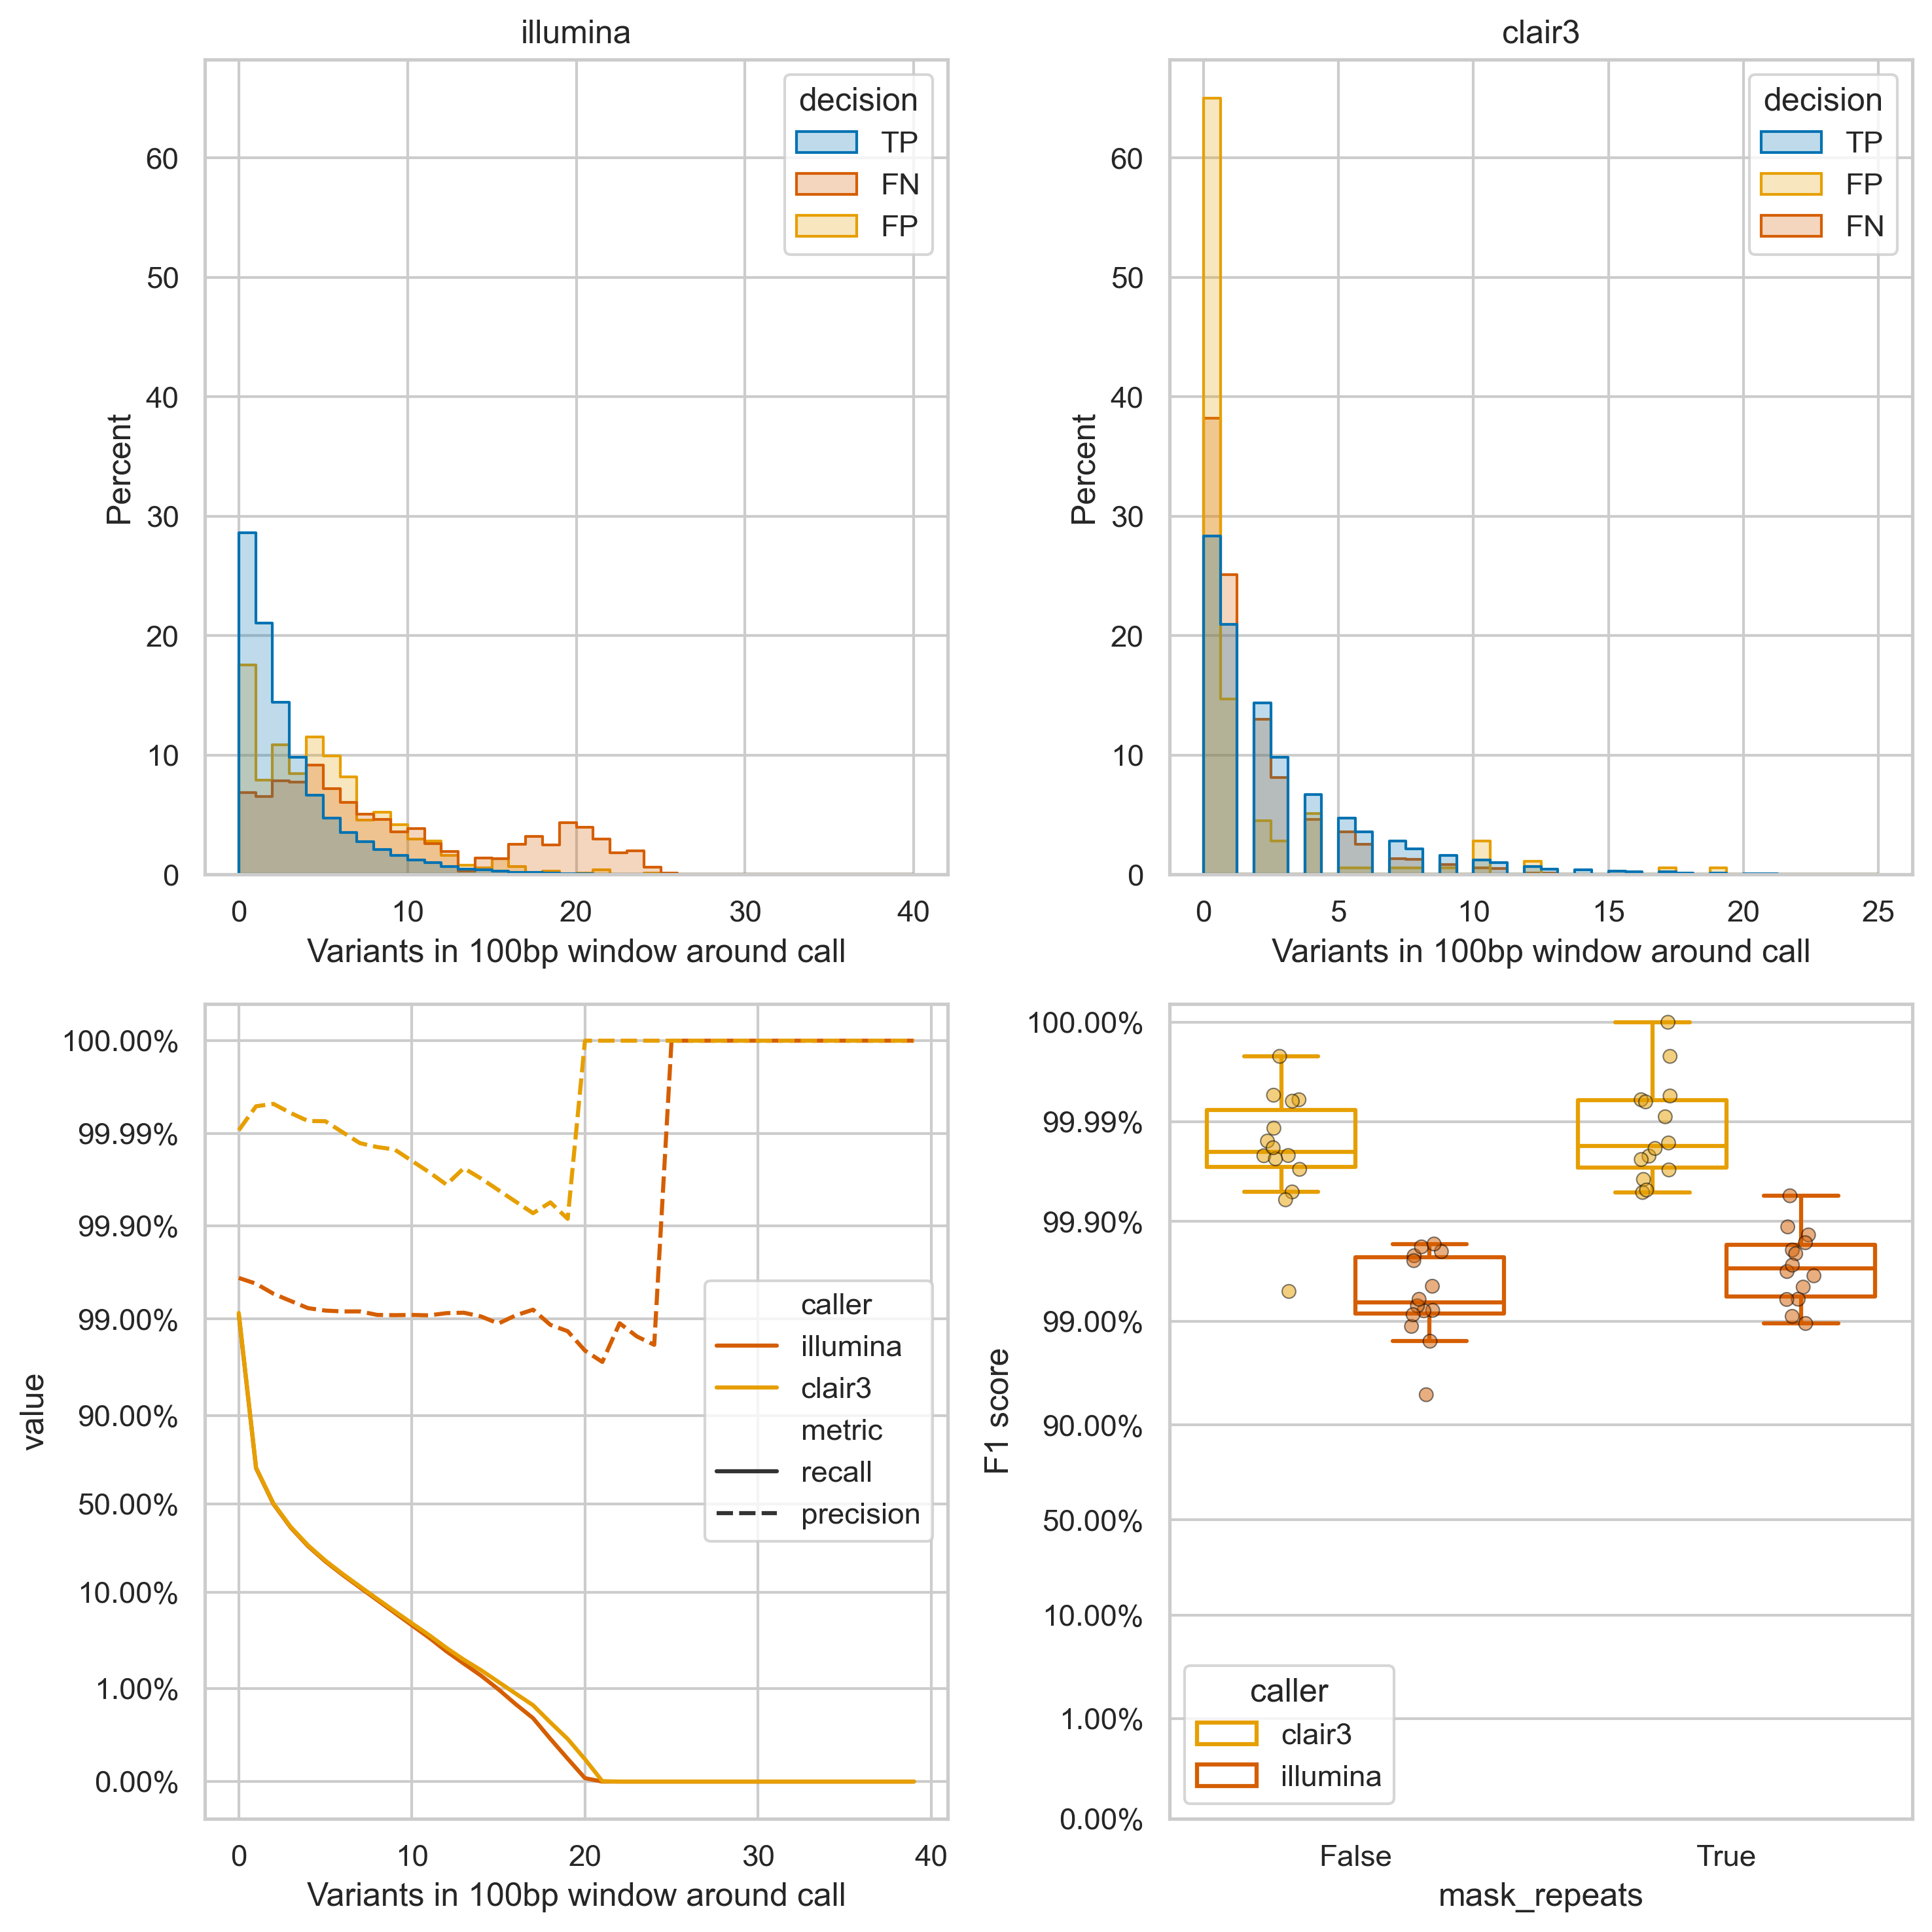

In [154]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    2, 2, figsize=(10, 10), dpi=300,
)

ax1.sharey(ax2)

for caller, ax in [("illumina", ax1), ("clair3", ax2)]:
    palette = {
        "TP": named_colors["blue"],
        "FP": named_colors["orange"],
        "FN": named_colors["vermilion"],
    }
    if caller == "illumina":
        qry = f"caller == '{caller}'"
    else:
        qry = f"caller == '{caller}' and model != 'fast'"
    data = df.query(qry)
    bins = 40
    sns.histplot(
        data=data,
        x="density",
        hue="decision",
        bins=bins,
        stat="percent",
        common_norm=False,
        element="step",
        # fill=False,
        palette=palette,
        ax=ax,
        legend=True,
    )

    ax.set_title(caller)

    ax.set_xlabel("Variants in 100bp window around call")

hue_order = sorted(set(df["caller"]))
# move illumina to end
hue_order.remove("illumina")
hue_order.append("illumina")
# map each caller in hue order to a colour in cud
palette = {c: cud()[i] for i, c in enumerate(hue_order)}

vals = []
x = "density"
ax = ax3
for caller in ["illumina", "clair3"]:
    if caller == "illumina":
        qry = f"caller == '{caller}'"
    else:
        qry = f"caller == '{caller}' and model == 'sup'"
    data = df.query(qry)
    # calculate precision and recall from the decision column with an increasing threshold
    # on the x column
    rng = list(range(0, 40, 1))

    recall_denom = data.query("decision != 'FP'").shape[0]

    for threshold in rng:
        threshold = round(threshold)
        tp = data.query(f"decision == 'TP' and {x} >= {threshold}").shape[0]
        fp = data.query(f"decision == 'FP' and {x} >= {threshold}").shape[0]
        fn = data.query(f"decision == 'FN' and {x} >= {threshold}").shape[0]
        precision = tp / (tp + fp) if tp + fp > 0 else 1
        recall = tp / recall_denom if recall_denom > 0 else 1
        vals.append(
            {
                "caller": caller,
                "threshold": threshold,
                "metric": "recall",
                "value": recall,
            }
        )
        vals.append(
            {
                "caller": caller,
                "threshold": threshold,
                "metric": "precision",
                "value": precision,
            }
        )

pr_df = pd.DataFrame(vals)
cap = 0.99999
low_cap = 0.001
pr_df.loc[:, "value"] = pr_df["value"].replace({1: cap})
pr_df.loc[:, "value"] = pr_df["value"].apply(lambda v: low_cap if v < low_cap else v)
sns.lineplot(
    data=pr_df,
    x="threshold",
    y="value",
    hue="caller",
    ax=ax,
    palette=palette,
    style="metric",
    legend=True,
)

ax.set_yscale("logit", nonpositive="clip")
yticks = [low_cap, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999, 0.9999, cap]
yticklabels = [f"{yval:.2%}" if yval > low_cap else "0.00%" for yval in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.set_xlabel("Variants in 100bp window around call")

ax = ax4
vals = []
for b in [True, False]:
    for caller in ["illumina", "clair3"]:
        if caller == "illumina":
            qry = f"caller == '{caller}'"
        else:
            qry = f"caller == '{caller}' and model == 'sup'"
        data = df.query(qry)
        threshold = int(b)
        tp = data.query(f"decision == 'TP' and dist >= {threshold}").shape[0]
        fp = data.query(f"decision == 'FP' and dist >= {threshold}").shape[0]
        fn = data.query(f"decision == 'FN' and dist >= {threshold}").shape[0]
        precision = tp / (tp + fp) if tp + fp > 0 else 1
        recall = tp / (tp + fn) if tp + fn > 0 else 1
        vals.append(
            {
                "caller": caller,
                "metric": "recall",
                "value": recall,
                "exclude_repetitive": b,
            }
        )
        vals.append(
            {
                "caller": caller,
                "metric": "precision",
                "value": precision,
                "exclude_repetitive": b,
            }
        )

x = "mask_repeats"
y = "F1_SCORE"
hue = "caller"

best_mask.loc[:, y] = best_mask[y].apply(lambda v: cap if v > cap else v)

sns.stripplot(
    data=best_mask,
    x=x,
    y=y,
    hue=hue,
    ax=ax,
    palette=palette,
    dodge=True,
    linewidth=0.5,
    alpha=0.5,
    legend=False
)
sns.boxplot(
    data=best_mask,
    x=x,
    y=y,
    hue=hue,
    ax=ax,
    palette=palette,
    showfliers=False,
    dodge=True,
    fill=False,
)

ax4.set_ylabel("F1 score") 
ax4.set_yscale("logit")
ax4.set_yticks(yticks)
ax4.set_yticklabels(yticklabels)

fig.tight_layout()